## Notebook desenvolvido para elaborar as figuras referentes ao conjunto de dados reais: mapa de localização e mapa de anomalia magnética.

In [1]:
#Importa as bibliotecas necessárias
import numpy
from time import time
from matplotlib import pyplot

In [67]:
from codes.grids import regular_grid

In [68]:
# Carrega o dado para definir a area de estudo
utmx, utmy, lon, lat, tf = numpy.loadtxt('real_data/cabofrio/cabofrio.dat', usecols = (0, 1, 2,3,4), unpack=True)

In [76]:
from utm import from_latlon

In [77]:
conversor = numpy.zeros((lon.size, 2))

In [78]:
print from_latlon(-5., -46.)

(389140.07295107335, 9447251.37909034, 23)


In [112]:
for i in range(lon.size):
    abc = from_latlon(lat[i], lon[i], 24)
    conversor[i:,0] = abc[0]
    conversor[i:,1] = abc[1]

In [113]:
y = conversor[:,0]
x = conversor[:,1]

In [114]:
print x.min(), x.max(), x.mean()
print y.min(), y.max(), y.mean()

7447715.10582 7462301.80761 7455070.74447
187183.873965 198714.401509 192882.053038


In [115]:
print x.min(), x.max(), x.mean()
print y.min(), y.max(), y.mean()

7447715.10582 7462301.80761 7455070.74447
187183.873965 198714.401509 192882.053038


In [116]:
yo, xo, zo = regular_grid((x.min(), x.max(), y.min(), y.max()), (40, 40), -500.)

In [117]:
longitude = numpy.linspace(lon.min(), lon.max(), 40)
latitude = numpy.linspace(lat.min(), lat.max(), 40)

In [118]:
LONG, LAT = numpy.meshgrid(longitude, latitude)

In [119]:
from scipy.interpolate import griddata

In [120]:
longlatoriginal = (lon, lat)
longlatgrid = (LONG, LAT)

In [121]:
data = griddata(longlatoriginal, tf, longlatgrid)

In [122]:
print data.shape

(40, 40)


In [123]:
print LONG[30,30]
print LAT[30,30]

-41.9653923077
-22.95


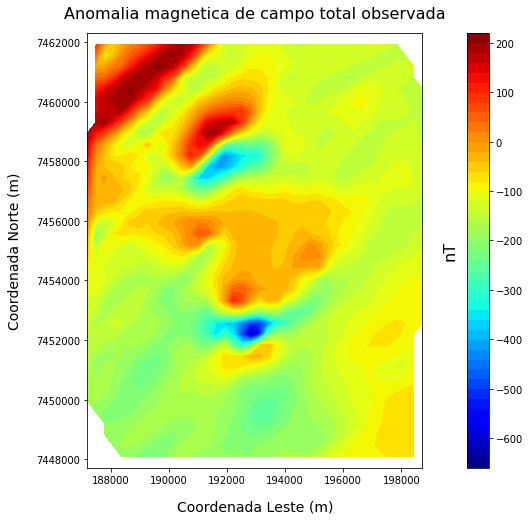

In [124]:
# Plota o dado original
# Plota o dado de Cabo Frio
pyplot.figure(figsize=(8, 8))
figdata = pyplot.contourf(xo.reshape(40,40), yo.reshape(40,40), data, 50, cmap = pyplot.cm.jet)
#pyplot.plot(lrcorners, ubcorners, 'k.--', markersize = 5)
#pyplot.plot(195904, 7458677, 'ko')
pyplot.xlabel('Coordenada Leste (m)', fontsize = 14, labelpad = 15)
pyplot.ylabel('Coordenada Norte (m)', fontsize = 14, labelpad = 15)
#pyplot.xticks(numpy.linspace(lon.min(), lon.max(), 5), fontsize = 12, y = -0.001)
#pyplot.yticks(numpy.linspace(lat.min(), lat.max(), 5), fontsize = 12, y = -0.001)
cbdata = pyplot.colorbar(figdata, orientation = 'vertical', pad = 0.1)
cbdata.set_label('nT', size = 16, labelpad = -80)
pyplot.title('Anomalia magnetica de campo total observada', fontsize = 16, y = 1.02)
#pyplot.legend(loc = 'lower left', fontsize = 'x-large')
#pyplot.savefig('figs-seminario2018/fig-cabofrio-anomaly.png', dpi = 300, bbox_inches='tight')
pyplot.show()

In [ ]:
# Salvar os dados de Arraial do Cabo
arraialdata = []

In [ ]:
# Recorta o dado para anomalia especifica
for i in range(cabofriodata.shape[1]):
    if (cabofriodata[0,i] >= lrcorners[0] and cabofriodata[0,i] <= lrcorners[-2]) and \
       (cabofriodata[1,i] >= ubcorners[0] and cabofriodata[1,i] <= ubcorners[1]):
        arraialdata.append(cabofriodata[:,i])
# True condition
# if (cabofriodata[0,i] >= 1422000. and cabofriodata[0,i] <= 1427000.) and \
# (cabofriodata[1,i] >= 7431000. and cabofriodata[1,i] <= 7435000.):

In [ ]:
# Reescreve o arquivo para salvá-lo
data = numpy.array(arraialdata)
numpy.savetxt('data-arraial-cut.dat', data, fmt = '%10.4f', delimiter = '\t')

In [ ]:
x, y, lon, lat, tf = data[:,0], data[:,1], data[:,2], data[:,3], data[:,4]

In [ ]:
# Construição do mapa de localização
from matplotlib.patches import Polygon
from mpl_toolkits.basemap import Basemap
from matplotlib.collections import PatchCollection

In [ ]:
# Define as coordenadas
bra_west = -65#-50.
bra_east = -35.#-40.
bra_north = 0.#-15. 
bra_south = -30.#-20.
bra_lat0 = 0.5*(bra_north + bra_south)
bra_lon0 = 0.5*(bra_west + bra_east)
# Area
brazilarea = [bra_west, bra_east, bra_north, bra_south]

In [ ]:
# Cria o basemap
location = Basemap(resolution = 'f',projection = 'cyl',
                   llcrnrlon = bra_west, llcrnrlat = bra_south,
                   urcrnrlon = bra_east, urcrnrlat = bra_north)

In [ ]:
# Define paralelos e meridianos
parallels = numpy.linspace(-90., 90., 37)
meridians = numpy.linspace(0., 360., 73)

In [ ]:
# Define as coordenadas e area
longmin = lon.min()
longmax = lon.max()
latmin = lat.min()
latmax = lat.max()
long0 = 0.5*(longmax + longmin)
lat0 = 0.5*(latmax + latmin)
# Area
locationarea = [longmin, longmax, latmin, latmax]

In [ ]:
# Cria um poligono para adicao ao Basemap
patches = []
myarea = numpy.array([[longmin - 0.25, latmax + 0.25], [longmax + 0.25, latmax + 0.25], 
                      [longmax + 0.25, latmin - 0.25], [longmin - 0.25, latmin - 0.25]])
patches.append(Polygon(myarea))

In [ ]:
# Cria a figura de localizacao
figure = pyplot.figure(figsize=(12, 10))
ax = figure.add_subplot(111)
#figure = location.arcgisimage(service='ESRI_Imagery_World_2D', xpixels = 1000, dpi = 100, verbose = False)
figure = location.arcgisimage(service='NatGeo_World_Map', xpixels = 1000, ypixels = 1000, dpi = 300, verbose = False)
#figure = location.arcgisimage(service='World_Topo_Map', xpixels = 1000, dpi = 100, verbose = False)
#figure = location.arcgisimage(service='World_Street_Map', xpixels = 1000, ypixels = 1000, dpi = 100, verbose = False)
#figure = location.arcgisimage(service='ESRI_StreetMap_World_2D', xpixels = 1000, ypixels = 1000, 
#                                 dpi = 600, verbose = False)
#figure = location.arcgisimage(service='World_Imagery', xpixels = 1000, dpi = 100, verbose = False)
figure = location.drawparallels(parallels, labels=[1,0,0,0], linewidth = 0.25, fontsize = 12)
figure = location.drawmeridians(meridians, labels=[0,0,0,1], linewidth = 0.25, fontsize = 12)
ax.add_collection(PatchCollection(patches, edgecolor = 'r', facecolor = 'None', linewidths = 1))
ax.set_xlabel('Longitude (graus)', fontsize = 14, labelpad = 25)
ax.set_ylabel('Latitude (graus)', fontsize = 14, labelpad = 50)
ax.set_title('Mapa completo de localizacao (Rio de Janeiro, Brasil)', fontsize = 16, y = 1.00)

pyplot.savefig('figs-seminario2018/fig-location.png', dpi = 300, bbox_inches='tight')
pyplot.show()

In [ ]:
# Define as coordenadas
rj_west = -42.25#43.
rj_east = -41.75
rj_north = -22.75 #22.
rj_south = -23.25
rj_lat0 = 0.5*(rj_north + rj_south)
rj_lon0 = 0.5*(rj_west + rj_east)
# Area
rj_area = [rj_west, rj_east, rj_north, rj_south]

In [ ]:
# Define paralelos e meridianos
rj_parallels = numpy.linspace(rj_south, rj_north, 3)
rj_meridians = numpy.linspace(rj_west, rj_east, 3)

In [ ]:
# Cria o basemap
rj_location = Basemap(resolution = 'f',projection = 'cyl',
                      llcrnrlon = rj_west, llcrnrlat = rj_south,
                      urcrnrlon = rj_east, urcrnrlat = rj_north)

In [ ]:
# Cria um poligono para adicao ao Basemap
rj_patches = []
study_area = numpy.array([[longmin, latmax], [longmax, latmax], 
                          [longmax, latmin], [longmin, latmin]])
rj_patches.append(Polygon(study_area))

In [ ]:
# Cria a figura de localizacao
figure = pyplot.figure(figsize=(10,10))
ax = figure.add_subplot(111)
#figure = rj_location.arcgisimage(service='ESRI_Imagery_World_2D', xpixels = 1000, ypixels = 1000,dpi = 100, verbose = False)
figure = rj_location.arcgisimage(service='NatGeo_World_Map', xpixels = 1000, ypixels = 1000, dpi = 300, verbose = False)
#figure = rj_location.arcgisimage(service='World_Topo_Map', xpixels = 1000, ypixels = 1000,dpi = 100, verbose = False)
#figure = rj_location.arcgisimage(service='World_Street_Map', xpixels = 1000, ypixels = 1000,dpi = 100, verbose = False)
#figure = rj_location.arcgisimage(service='ESRI_StreetMap_World_2D', xpixels = 1000, ypixels = 1000, 
#                                 dpi = 900, verbose = False)
#figure = rj_location.arcgisimage(service='World_Imagery', xpixels = 1000, ypixels = 1000,dpi = 100, verbose = False)
figure = rj_location.drawparallels(rj_parallels, labels=[1,0,0,0], linewidth = 0.25, fontsize = 12)
figure = rj_location.drawmeridians(rj_meridians, labels=[0,0,0,1], linewidth = 0.25, fontsize = 12)
ax.add_collection(PatchCollection(rj_patches, edgecolor = 'r', facecolor ='None', linewidths = 2))
ax.set_xlabel('Longitude (graus)', fontsize = 14, labelpad = 25)
ax.set_ylabel('Latitude (graus)', fontsize = 14, labelpad = 50)

pyplot.savefig('figs-seminario2018/fig-location-arraial.png', dpi = 300, bbox_inches='tight')
pyplot.show()

In [ ]:
# Importando a funcao de plot de anomalia magnetica
#from codes.plot import plota_mapa

# Cria o basemap para o dado de Arraial
#arraial = Basemap(llcrnrlon = longmin, llcrnrlat = latmin,
#                  urcrnrlon = longmax, urcrnrlat = latmax,
#                  resolution = 'f',projection = 'cyl')
# Para projeções 'merc' ou 'tmerc': lon_0 = long0, lat_0 = lat0
#xlon, ylat = arraial(lon, lat)

# Define o titulo do mapa
#titulo = 'Anomalia de campo total observada'

# Plota o resultado
#plota_mapa(arraial, lon, lat, z, locationarea, 'nT', titulo, 16, 'jet', (12, 10), 1.)

In [ ]:
# Plota o dado de Cabo Frio
pyplot.figure(figsize=(8, 8))
figdata = pyplot.tricontourf(lon, lat, tf, 50, cmap = pyplot.cm.jet)
#pyplot.tricontour(lon, lat, z, 20, color = 'k', linestyle = 'dashed', linewidths = 0.5)
pyplot.plot(lon, lat, 'k.', markersize = 0.1)
pyplot.xlabel('Longitude (graus)', fontsize = 14, labelpad = 10)
pyplot.ylabel('Latitude (graus)', fontsize = 14, labelpad = 10)
pyplot.xticks(numpy.linspace(lon.min(), lon.max(), 4), 
              fontsize = 12, y = -0.001)
pyplot.yticks(numpy.linspace(lat.min(), lat.max(), 4), 
              fontsize = 12, y = -0.001)
cbdata = pyplot.colorbar(figdata, orientation = 'vertical', pad = 0.1)
cbdata.set_label('nT', size = 16, labelpad = 10)
pyplot.title('Anomalia de campo total observada', fontsize = 14, y = 1.02)
#pyplot.legend(loc = 'lower left', fontsize = 'x-large')
pyplot.savefig('figs-seminario2018/fig-arraial-latlong.png', dpi = 300, bbox_inches='tight')
pyplot.show()

In [ ]:
# Plota o dado de Cabo Frio
pyplot.figure(figsize=(8, 8))
figdata = pyplot.tricontourf(x, y, tf, 50, cmap = pyplot.cm.jet)
#pyplot.tricontour(lon, lat, z, 20, color = 'k', linestyle = 'dashed', linewidths = 0.5)
#pyplot.plot(x, y, 'k.', markersize = 0.05)
pyplot.xlabel('Coordenada Leste (m)', fontsize = 14, labelpad = 15)
pyplot.ylabel('Coordenada Norte (m)', fontsize = 14, labelpad = 15)
pyplot.xticks(numpy.linspace(x.min(), x.max(), 5), fontsize = 12, y = -0.001)
pyplot.yticks(numpy.linspace(y.min(), y.max(), 6), fontsize = 12, y = -0.001)
cbdata = pyplot.colorbar(figdata, orientation = 'vertical', pad = 0.1)
cbdata.set_label('nT', size = 16, labelpad = -80)
pyplot.title('Anomalia magnetica de Arraial do Cabo', fontsize = 16, y = 1.02)
#pyplot.legend(loc = 'lower left', fontsize = 'x-large')
pyplot.savefig('figs-seminario2018/fig-arraial-utm.png', dpi = 300, bbox_inches='tight')
pyplot.show()

In [ ]:
# Importando a funcao de analise de dados
from codes.statistical import analysis

In [ ]:
_ = analysis(tf, 'nT')

In [ ]:
# Funcao para construcao de grid e interpolacao dos dados
from codes.grids import regular_grid
from scipy.interpolate import griddata

In [ ]:
# Define o numero de pontos em x e y
nx = numpy.int(numpy.ceil(numpy.sqrt(x.size)*(0.6)))
ny = numpy.int(numpy.ceil(numpy.sqrt(y.size)*(0.6)))

In [ ]:
# Define os valores de area e shape
area = [x.min(), x.max(), y.min(), y.max()]
shape = (nx, ny)
xo, yo, zo = regular_grid(area, shape, -100.)

In [ ]:
# Interpola o dado
newtf = griddata((x, y), tf, (xo, yo), method = 'linear', fill_value = 0.)#tf.mean())

In [ ]:
# Fazemos o plot para validar a interpolação
# Plota o dado de Cabo Frio
pyplot.figure(figsize=(8, 8))
figdata = pyplot.tricontourf(xo, yo, newtf, 50, cmap = pyplot.cm.jet)
#pyplot.plot(x, y, 'k.', markersize = 0.2)
pyplot.plot(xo, yo, 'k*', markersize = 1.)
pyplot.xlabel('Coordenada Leste (m)', fontsize = 14, labelpad = 12)
pyplot.ylabel('Coordenada Norte (m)', fontsize = 14, labelpad = 12)
pyplot.xticks(numpy.linspace(xo.min(), xo.max(), 5), fontsize = 10, y = -0.001)
pyplot.yticks(numpy.linspace(yo.min(), yo.max(), 6), fontsize = 10, y = -0.001)
cbdata = pyplot.colorbar(figdata, orientation = 'vertical', pad = 0.1)
cbdata.set_label('nT', size = 16, labelpad = -75)
pyplot.title('Anomalia de campo total apos interpolacao', fontsize = 14, y = 1.02)
#pyplot.legend(loc = 'lower left', fontsize = 'x-large')
#pyplot.savefig('figs-seminario2018/fig-arraial-interpolada.png', dpi = 300, bbox_inches='tight')
pyplot.show()

In [ ]:
# Importa as funcoes de reducao e derivadsa
from codes.statistical import cccoef
from codes.filtering import reduction
from codes.derivative import totalgrad, zderiv

In [ ]:
# Realiza a leitura dos dados de inclinacao e declinacao da regiao
inclinacao, declinacao = numpy.loadtxt('real_data/arraialdocabo/arraial-2000-2004.txt', usecols=(0,1), unpack=True)

In [ ]:
# Calcula os valores medicos
inc = inclinacao.mean()
dec = declinacao.mean()

In [ ]:
# Mostra os valores de inclinacao e declinacao
print 'Inclinacao: %.3f' % inc
print 'Declinacao: %.3f' % dec

In [ ]:
# Importa o codigo para construcao da camada equivalente
from codes.equivalentlayer import layer, fit_layer, rtp_layer

In [ ]:
# Construindo uma camada equivalente
area_layer = area
shape_layer = (15, 15)
level = 500.

In [ ]:
# Calcula a camada equivalente
eqlayer = layer(area_layer, shape_layer, level)

In [ ]:
# Aloca todos os valores em uma lista
data = [xo, yo, zo, newtf]

In [ ]:
# Calcula o dado predito}
vec, predicted = fit_layer(data, shape, eqlayer, shape_layer, 0.00435, inc, dec, inc, dec)

In [ ]:
# Plota o resultado
pyplot.figure(figsize=(8, 8))
pyplot.contourf(xo.reshape(shape), yo.reshape(shape), predicted.reshape(shape),
                50, cmap = pyplot.cm.jet)
pyplot.title('Anomalia de campo total predita (nT)', fontsize = 16)
pyplot.xlabel('Coordenada Leste (m)', fontsize = 14, labelpad = 12)
pyplot.ylabel('Coordenada Norte (m)', fontsize = 14, labelpad = 12)
pyplot.xticks(numpy.linspace(xo.min(), xo.max(), 5), fontsize = 10, y = -0.001)
pyplot.yticks(numpy.linspace(yo.min(), yo.max(), 6), fontsize = 10, y = -0.001)
cbdata = pyplot.colorbar(figdata, orientation = 'vertical', pad = 0.1)
cbdata.set_label('nT', size = 16, labelpad = -75)

#pyplot.savefig('figs-seminario2018/fig-arraial-predicted.png', dpi = 600, bbox_inches = 'tight')
pyplot.show()

In [ ]:
# Novo grid de inclinacao e declinacao
inclination = numpy.linspace(-90., 90., 91)
declination = numpy.linspace(-180., 180., 91) #(-90., 90., 31)
D, I = numpy.meshgrid(declination, inclination)

In [ ]:
# Cria a matriz nula para correlação
result = numpy.zeros_like(D)

In [ ]:
# Reshape dos dados
xobs = xo.reshape(shape)
yobs = yo.reshape(shape)
dobs = newtf.reshape(shape)

In [ ]:
# Computando a correlação utilizando somente camada equivalente
initial = time()
for k2, d in enumerate(declination):
    for k1, i in enumerate(inclination):
        if i >= -10. or i <= 10.:
            rtp = rtp_layer(data, shape, eqlayer, shape_layer, 0.001, inc, dec, i, d)
            result[k1,k2] = cccoef(totalgrad(xobs, yobs, rtp), 
                                   zderiv(xobs, yobs, rtp))
        else:
            rtp = reduction(xobs, yobs, dobs, inc, dec, i, d)
            result[k1,k2] = cccoef(totalgrad(xobs, yobs, rtp),
                                   zderiv(xobs, yobs, rtp))
final = time()
print 'Tempo de calculo (sec): %.3f' % (final-initial)

In [ ]:
print 'Maxima correlacao:', result.max()
print 'Minima correlacao:', result.min()

In [ ]:
imax, jmax = numpy.where(result == result.max())
imin, jmin = numpy.where(result == result.min())
incmax = float(I[imax, jmax])
decmax = float(D[imax, jmax])
incmin = float(I[imin, jmin])
decmin = float(D[imin, jmin])
print '(I,D) maximo:', incmax, decmax
print '(I,D) minimo:', incmin, decmin

In [ ]:
# Plota o mapa de correlacao
pyplot.figure(figsize=(10, 8))
figreal = pyplot.contour(D, I, result, 15, colors = 'k', linestyle = 'solid', linewidths = 1)
pyplot.contourf(D, I, result, 15, cmap = pyplot.cm.gray)
pyplot.clabel(figreal, fontsize = 8)
pyplot.plot(decmax, incmax, 'b*', label = 'Direcao calculada', markersize = 10)
pyplot.title('Distribuicao dos coeficientes de correlacao cruzada', fontsize = 16)
pyplot.xlabel('Declinacao (graus)', fontsize = 14)
pyplot.ylabel('Inclinacao (graus)', fontsize = 14)
pyplot.xticks(numpy.linspace(D.min(), D.max(), 7), fontsize = 14)
pyplot.yticks(numpy.linspace(I.min(), I.max(), 6), fontsize = 14)
pyplot.legend(loc = 'upper left', fontsize = 'large')
pyplot.colorbar()
pyplot.grid(color = 'k', linestyle='--', linewidth = .5)
pyplot.savefig('figs-seminario2018/fig-arraial-correlation.png', dpi = 300, bbox_inches = 'tight')
pyplot.show()

In [ ]:
# Calculando a reducao ao polo em baixa latitude
rtp_arraial = rtp_layer(data, shape, layer(area_layer, (40, 40), 150.), 
                        (40, 40), 1.0000001, inc, dec, incmax, decmax)

In [ ]:
# Plota o resultado
pyplot.figure(figsize=(8, 6))
pyplot.contourf(xo.reshape(shape), yo.reshape(shape), rtp_arraial, 50, cmap = pyplot.cm.jet)
pyplot.title('Anomalia magnetica reduzida ao Polo (nT)', fontsize = 16)
pyplot.xlabel('Coordenada Leste (m)', fontsize = 14, labelpad = 10)
pyplot.ylabel('Coordenada Norte (m)', fontsize = 14, labelpad = 10)
pyplot.xticks(numpy.linspace(xo.min(), xo.max(), 5), fontsize = 12)
pyplot.yticks(numpy.linspace(yo.min(), yo.max(), 5), fontsize = 12)
pyplot.colorbar(orientation = 'vertical')

pyplot.savefig('figs-seminario2018/fig-arraial-reduced.png', dpi = 300, bbox_inches = 'tight')
pyplot.show()

In [ ]:
# Aplicando o teste de continuação para cima
from codes.filtering import continuation

In [ ]:
# Calculando a continuacao
up = continuation(xobs, yobs, dobs, 100.)

In [ ]:
# Fazemos o plot para validar a interpolação
# Plota o dado de Cabo Frio
pyplot.figure(figsize=(8, 8))
figdata = pyplot.contourf(xobs, yobs, dobs-up, 50, cmap = pyplot.cm.jet)
pyplot.xlabel('Coordenada Leste (m)', fontsize = 14, labelpad = 12)
pyplot.ylabel('Coordenada Norte (m)', fontsize = 14, labelpad = 12)
pyplot.xticks(numpy.linspace(xobs.min(), xobs.max(), 5), fontsize = 10, y = -0.001)
pyplot.yticks(numpy.linspace(yobs.min(), yobs.max(), 6), fontsize = 10, y = -0.001)
cbdata = pyplot.colorbar(figdata, orientation = 'vertical', pad = 0.1)
cbdata.set_label('nT', size = 16, labelpad = -75)
pyplot.title('Anomalia de campo total continuada $200$ m', fontsize = 14, y = 1.02)
pyplot.legend(loc = 'lower left', fontsize = 'x-large')
#pyplot.savefig('figs-seminario2018/fig-arraial-continuada.png', dpi = 300, bbox_inches='tight')
pyplot.show()

In [ ]:
# Reshape do novo dado
#tfup = up.reshape(up.size)

In [ ]:
# Nova lista de dados para cálculo da correlação
newdata = [xo, yo, zo, rtp_arraial.reshape(rtp_arraial.size)]

In [ ]:
# Cria a matriz nula para correlação
newresult = numpy.zeros_like(D)

In [ ]:
# Computando a correlação utilizando para o dado continuado
initial = time()
for k2, d in enumerate(declination):
    for k1, i in enumerate(inclination):
        if i >= -10. or i <= 10.:
            rtp = rtp_layer(newdata, shape, eqlayer, shape_layer, 0.006, inc, dec, i, d)
            newresult[k1,k2] = cccoef(totalgrad(xobs, yobs, rtp), 
                                      zderiv(xobs, yobs, rtp))
        else:
            rtp = reduction(xobs, yobs, rtp_arraial, inc, dec, i, d)
            newresult[k1,k2] = cccoef(totalgrad(xobs, yobs, rtp),
                                      zderiv(xobs, yobs, rtp))
final = time()
print 'Tempo de calculo (sec): %.3f' % (final-initial)

In [ ]:
print 'Maxima correlacao:', newresult.max()
print 'Minima correlacao:', newresult.min()

In [ ]:
newimax, newjmax = numpy.where(newresult == newresult.max())
newimin, newjmin = numpy.where(newresult == newresult.min())
newincmax = float(I[newimax, newjmax])
newdecmax = float(D[newimax, newjmax])
newincmin = float(I[newimin, newjmin])
newdecmin = float(D[newimin, newjmin])
print '(I,D) maximo:', newincmax, newdecmax
print '(I,D) minimo:', newincmin, newdecmin

In [ ]:
# Plota o mapa de correlacao
pyplot.figure(figsize=(10, 8))
figreal = pyplot.contour(D, I, newresult, 15, colors = 'k', linestyle = 'solid', linewidths = 1)
pyplot.contourf(D, I, newresult, 15, cmap = pyplot.cm.gray)
pyplot.clabel(figreal, fontsize = 8)
pyplot.plot(newdecmax, newincmax, 'b*', label = 'Direcao calculada', markersize = 10)
pyplot.title('Correlacao cruzada para o dado continuado $200 \, m$', fontsize = 16)
pyplot.xlabel('Declinacao (graus)', fontsize = 14)
pyplot.ylabel('Inclinacao (graus)', fontsize = 14)
pyplot.xticks(numpy.linspace(D.min(), D.max(), 7), fontsize = 14)
pyplot.yticks(numpy.linspace(I.min(), I.max(), 6), fontsize = 14)
pyplot.legend(loc = 'upper right', fontsize = 'large')
pyplot.colorbar()
pyplot.grid(color = 'k', linestyle='--', linewidth = .5)
pyplot.savefig('figs-seminario2018/fig-arraial-correlation_upward.png', dpi = 300, bbox_inches = 'tight')
pyplot.show()